In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import FunctionTransformer


In [9]:
abalone_age_data = pd.read_csv('abalone_age.csv')
abalone_age_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
abalone_age_data['Age'] = abalone_age_data['Rings'] + 1.5

In [11]:
abalone_age_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [42]:
results_dict_3 = {}

In [43]:
lr = LinearRegression()

lr.fit(X_train, y_train)

train_pred_lr = lr.predict(X_test)

error = np.sqrt(mean_squared_error(y_test, train_pred_lr))

print("LinearRegression root-mean-squared-error: ", error)

results_dict_3['linear regression'] = error

LinearRegression root-mean-squared-error:  2.233734152318871


In [44]:
param_grid_svr = { 
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]
}

param_grid_knn = { 
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
}

param_grid_rf = { 
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
}

def grid_search_func(model_name, model, param_grid):
    
   """
       This function is for grid search the best hyperparameter for list of models
       
       Parameters:
       
       model_name: String
           The key for the dict
       
       model: model object
           The model for grid search
       
       param_grid: dict
           The dict for hyperparameters
       
   """
    
    search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    search.fit(X_train, y_train)
    
    train_pred = search.predict(X_test)

    error_score = np.sqrt(mean_squared_error(y_test, train_pred))

    print(model_name, "root mean squared error: ", error_score)
    

    results_dict_3[model_name] = [error_score]

In [45]:
grid_search_func('svr', SVR(), param_grid_svr)
grid_search_func('knn', KNeighborsRegressor(), param_grid_knn)
grid_search_func('random forest', RandomForestRegressor(), param_grid_rf)

svr root mean squared error:  2.1902461167563505
knn root mean squared error:  2.1936947487555565
random forest root mean squared error:  2.1591141457018517


In [53]:
results_df = pd.DataFrame(results_dict_3).T
results_df.columns = ["Root Mean Squared Error"]
results_df

,Root Mean Squared Error
linear regression,2.233734
svr,2.190246
knn,2.193695
random forest,2.159114


In [40]:
plot_df = y_test.to_frame().copy()
plot_df['LR'] = train_pred_lr
plot_df['SVR'] = train_pred_svr
plot_df['KNN'] = train_pred_knn
plot_df['RF'] = train_pred_rf

In [41]:
plot_df = plot_df.melt(id_vars = 'Age', var_name = 'Models', value_name = 'Predicted Age')
plot_df

,Age,Models,Predicted Age
0,10.5,LR,12.615768
1,13.5,LR,10.888819
2,13.5,LR,7.570511
3,12.5,LR,7.815178
4,17.5,LR,10.167046
...,...,...,...
3339,11.5,RF,13.602498
3340,12.5,RF,10.344539
3341,7.5,RF,8.614647
3342,7.5,RF,9.701307


In [43]:
import altair as alt

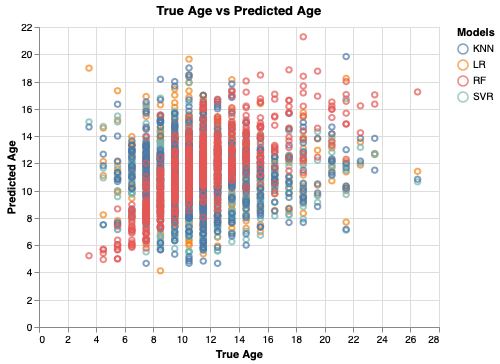

In [46]:
alt.Chart(plot_df).mark_point().encode(
    alt.X('Age', title='True Age'),
    alt.Y('Predicted Age'),
    color='Models'
).properties(title='True Age vs Predicted Age')

In [62]:
abalone_age_data = pd.read_csv('abalone_age.csv')
abalone_age_data['Age'] = abalone_age_data['Rings'] + 1.5

numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_features),
        ('ohe', OneHotEncoder(), categorical_features)])

X = abalone_age_data.drop(columns=['Rings', 'Age'])
y = abalone_age_data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVR())])

param_grid_4 = {
    'classifier__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]
}

grid_search = GridSearchCV(clf_4, param_grid_4, cv=5)

grid_search.fit(X_train, y_train)

train_err = 1 - grid_search.score(X_train, y_train)
test_err = 1 - grid_search.score(X_test, y_test)

print("Training Error: ", train_err)
print("Testing Error: ", test_err)

Training Error:  0.4392118898177607
Testing Error:  0.481991881163493
